In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from math import sqrt
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set()

In [2]:
bigMartData = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/bigmart_data.csv')

In [3]:
bigMartData.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
#check the shape of the data
bigMartData.shape

(8523, 12)

In [5]:
bigMartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
bigMartData['Item_Fat_Content'].value_counts()
'''
here we have multiple categorical data with same meaning so we need to replace them 
with common meaning full data
'''
bigMartData['Item_Fat_Content'] = np.where(bigMartData['Item_Fat_Content'].isin(['low fat','LF']), 'Low Fat',bigMartData['Item_Fat_Content'])


In [7]:
#post generalisation
bigMartData['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [8]:
bigMartData['Item_Type'].value_counts()
#seems fine

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
bigMartData['Outlet_Size'].value_counts()
#seems fine

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
bigMartData['Outlet_Location_Type'].value_counts()
#seems fine

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [11]:
bigMartData['Outlet_Type'].value_counts()
#seems fine

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
bigMartData['Outlet_Identifier'].value_counts()
#seems fine

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [13]:
bigMartData['Age_Of_Outlet'] = 2024 - bigMartData['Outlet_Establishment_Year']

In [14]:
bigMartData.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Of_Outlet
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,15
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,37
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,39
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,22
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,17


In [15]:
'''
Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges
'''
bigMartData['Item_Visibility_bins'] = pd.cut(bigMartData['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Visibility','Medium Visible','High Visible'])
bigMartData['Item_Visibility_bins'].value_counts().sum()
#has some missing values -- 7997


7863

In [16]:
#check for thr missing values
bigMartData.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Age_Of_Outlet                   0
Item_Visibility_bins          660
dtype: int64

In [17]:
bigMartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
 12  Age_Of_Outlet              8523 non-null   int64   
 13  Item_Visibility_bins       7863 n

In [18]:
'''
Before we move forward to cap the outliers we will be fixing the missing values.
here we will try to fill the missing values by mean for continuous data and most-frequent for catogorical
using Imputer and column Transformer,

'''
# Define the imputer for numerical data (using mean for example)
numeric_imputer = SimpleImputer(strategy='mean')

# Define the imputer for categorical data (using the most frequent value for example)
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_features = bigMartData.select_dtypes(include=['int64', 'float64']).columns
categorical_features = bigMartData.select_dtypes(include=['object','category']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_features),
        ('cat', categorical_imputer, categorical_features)
    ], 
    remainder='passthrough'  # To keep columns that are not explicitly selected
)


# Fit and transform the data
bigMartData_transformed = preprocessor.fit_transform(bigMartData)
# If you need to put the transformed data back into a DataFrame:
bigMartData_transformed = pd.DataFrame(bigMartData_transformed, columns=numeric_features.tolist() + categorical_features.tolist())

# Convert numeric columns back to their original types
for col in numeric_features:
    bigMartData_transformed[col] = bigMartData_transformed[col].astype(bigMartData[col].dtype)

# Convert categorical columns back to their original types
for col in categorical_features:
    bigMartData_transformed[col] = bigMartData_transformed[col].astype(bigMartData[col].dtype)

In [19]:
#validate the data
bigMartData_transformed.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Age_Of_Outlet                0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Visibility_bins         0
dtype: int64

Item_Weight                     AxesSubplot(0.125,0.11;0.110714x0.77)
Item_Visibility              AxesSubplot(0.257857,0.11;0.110714x0.77)
Item_MRP                     AxesSubplot(0.390714,0.11;0.110714x0.77)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.11;0.110714x0.77)
Item_Outlet_Sales            AxesSubplot(0.656429,0.11;0.110714x0.77)
Age_Of_Outlet                AxesSubplot(0.789286,0.11;0.110714x0.77)
dtype: object

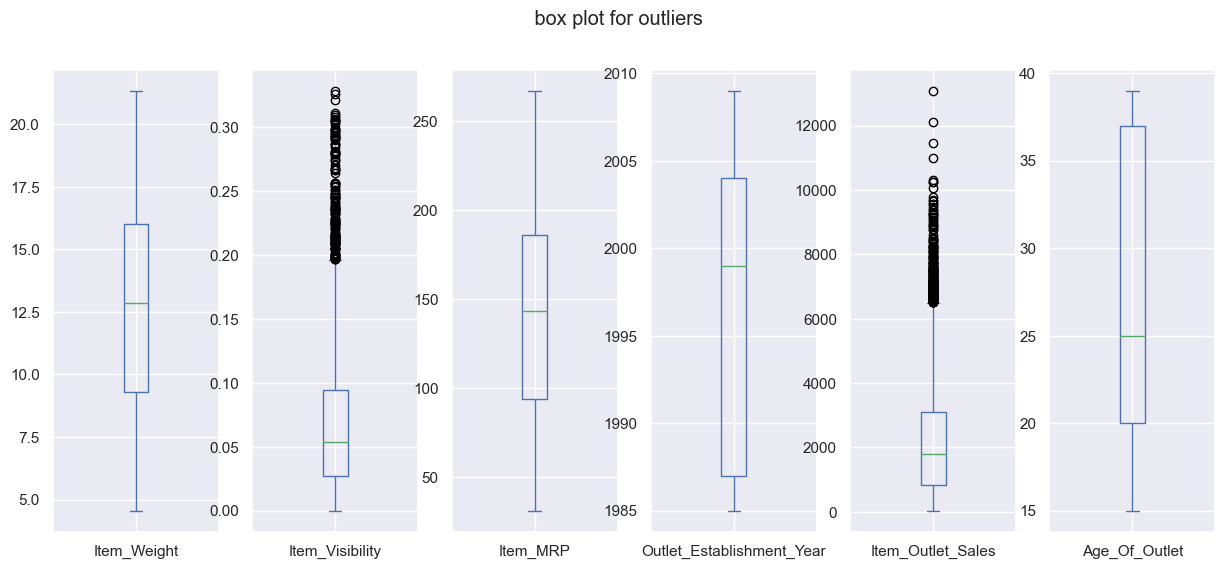

In [20]:
'''
now will check for the outliers and cap them to bounderies
'''
bigMartData_transformed[numeric_features.tolist()].plot(kind='box',subplots = True, figsize =(15,6),title = " box plot for outliers")

In [21]:
'''
we can see the outliers in the data and we need to cap them as we are dealing with regression 
model, if not handled the data will be sckewd and tend to mislead the model, we are excluding 'Item_Outlet_Sales'
'''
list_to_consider = [val for val in numeric_features.to_list() if val !='Item_Outlet_Sales']
for val in list_to_consider:
    q1,q3 = np.quantile(bigMartData_transformed[val],[0.25,0.75])
    iqr = q3-q1
    lowerLimit = q1-1.5*iqr
    upperLimit = q3+1.5*iqr
    bigMartData_transformed[val] = np.where(bigMartData_transformed[val] < lowerLimit, lowerLimit,bigMartData_transformed[val])
    bigMartData_transformed[val] = np.where(bigMartData_transformed[val] > upperLimit, upperLimit,bigMartData_transformed[val])   
    

'\nNow we can see that data has been handled for outliers\n'

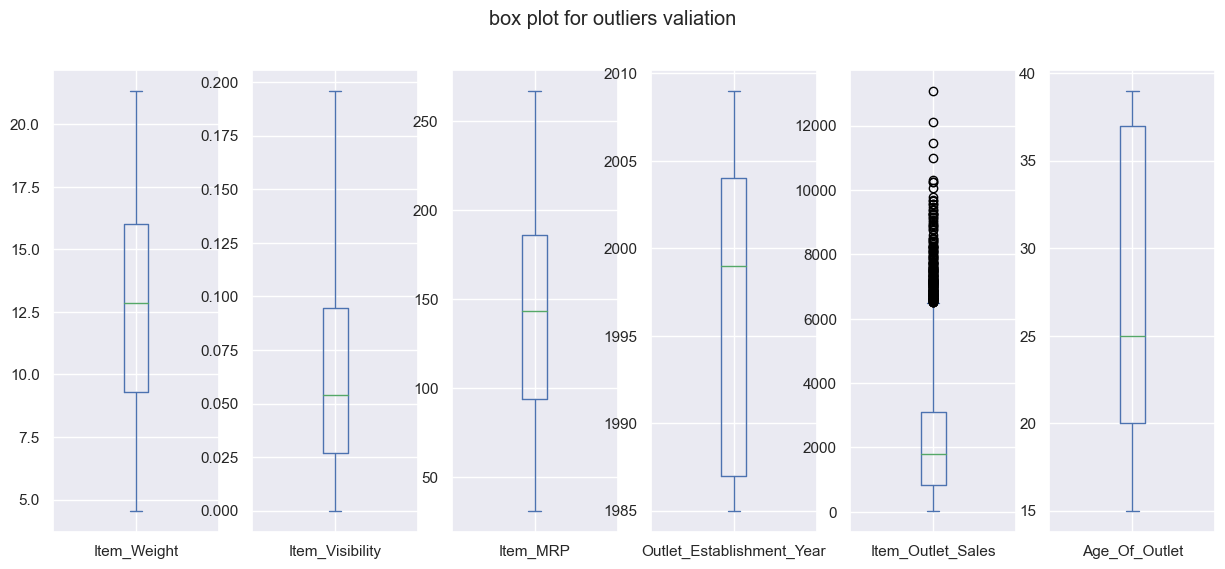

In [22]:
#validate the outliers now post capping except sales
bigMartData_transformed[numeric_features.to_list()].plot(kind='box',subplots=True,figsize=(15,6),title="box plot for outliers valiation ")
'''
Now we can see that data has been handled for outliers
'''

In [23]:
'''
Now lets use the labelEncoder from sklearn for encoding the lables
it will label the categorical data in a sequence from 0
use label encoding when the catgorical data size is known, it will be generic like ex--> medium, small ,large
'''
lableEncoder = LabelEncoder()
bigMartData_transformed['Item_Fat_Content'] = lableEncoder.fit_transform(bigMartData_transformed["Item_Fat_Content"])
bigMartData_transformed['Item_Visibility_bins'] = lableEncoder.fit_transform(bigMartData_transformed['Item_Visibility_bins'])
bigMartData_transformed['Outlet_Size'] = lableEncoder.fit_transform(bigMartData_transformed['Outlet_Size'])
bigMartData_transformed['Outlet_Location_Type'] = lableEncoder.fit_transform(bigMartData_transformed['Outlet_Location_Type'])
bigMartData_transformed['Item_Type'] = lableEncoder.fit_transform(bigMartData_transformed['Item_Type'])

#to check what value has our label-encoder has provided 
mapping = {label: index for index, label in enumerate(lableEncoder.classes_)}
mapping

{'Baking Goods': 0,
 'Breads': 1,
 'Breakfast': 2,
 'Canned': 3,
 'Dairy': 4,
 'Frozen Foods': 5,
 'Fruits and Vegetables': 6,
 'Hard Drinks': 7,
 'Health and Hygiene': 8,
 'Household': 9,
 'Meat': 10,
 'Others': 11,
 'Seafood': 12,
 'Snack Foods': 13,
 'Soft Drinks': 14,
 'Starchy Foods': 15}

In [24]:
#get the dummies for the Outlet_Type 
bigMartData_transformed = pd.get_dummies(bigMartData_transformed,columns=['Outlet_Type'])

In [25]:
#now drop the extra columns 
bigMartData_transformed = bigMartData_transformed.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'],axis=1)

In [26]:
bigMartData_transformed.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age_Of_Outlet,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Item_Visibility_bins,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0.016047,249.8092,3735.1380,25.0,0,4,1,0,1,0,1,0,0
1,5.920000,0.019278,48.2692,443.4228,15.0,1,14,1,2,1,0,0,1,0
2,17.500000,0.016760,141.6180,2097.2700,25.0,0,10,1,0,1,0,1,0,0
3,19.200000,0.000000,182.0950,732.3800,26.0,1,6,1,2,1,1,0,0,0
4,8.930000,0.000000,53.8614,994.7052,37.0,0,9,0,2,1,0,1,0,0
5,10.395000,0.000000,51.4008,556.6088,15.0,1,0,1,2,1,0,0,1,0
6,13.650000,0.012741,57.6588,343.5528,37.0,1,13,0,2,1,0,1,0,0
7,12.857645,0.127470,107.7622,4022.7636,39.0,0,13,1,2,2,0,0,0,1
8,16.200000,0.016687,96.9726,1076.5986,22.0,1,5,1,1,1,0,1,0,0
9,19.200000,0.094450,187.8214,4710.5350,17.0,1,5,1,1,2,0,1,0,0


In [27]:
'''
# Assuming train_data_transformed is your DataFrame and 'column_to_exclude' is the column you want to exclude
object_cols = list(train_data_transformed.select_dtypes(include=['object']).columns)
cols_to_encode = [col for col in object_cols if col not in ['Outlet_Identifier','Item_Identifier']]

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(sparse=False), cols_to_encode)],
    remainder='passthrough'  # Leaves the rest of the columns unchanged, including the excluded column
)

# Apply the ColumnTransformer
encoded_data = ct.fit_transform(train_data_transformed)

# Get feature names for one-hot encoded columns
feature_names = ct.named_transformers_['one_hot_encoder'].get_feature_names_out(cols_to_encode)
# Combine one-hot encoded columns with the rest of the columns (including the excluded one)
all_columns = cols_to_encode + [col for col in train_data_transformed.columns if col not in cols_to_encode]
final_feature_names = np.concatenate([feature_names, all_columns])


# Combine one-hot encoded columns with the rest of the columns (including the excluded one)
all_columns = cols_to_encode + [col for col in train_data_transformed.columns if col not in cols_to_encode]
final_feature_names = np.concatenate([feature_names, all_columns])

# Convert to DataFrame for better readability
final_train_data = pd.DataFrame(encoded_data, columns=final_feature_names)

# Since the transformation might change the order, ensure the excluded column is in its original place
final_train_data = final_train_data[[col for col in train_data_transformed.columns if col != 'Item_Identifier'] + ['Item_Identifier']]

final_train_data.head(10)
'''

"\n# Assuming train_data_transformed is your DataFrame and 'column_to_exclude' is the column you want to exclude\nobject_cols = list(train_data_transformed.select_dtypes(include=['object']).columns)\ncols_to_encode = [col for col in object_cols if col not in ['Outlet_Identifier','Item_Identifier']]\n\nct = ColumnTransformer(\n    [('one_hot_encoder', OneHotEncoder(sparse=False), cols_to_encode)],\n    remainder='passthrough'  # Leaves the rest of the columns unchanged, including the excluded column\n)\n\n# Apply the ColumnTransformer\nencoded_data = ct.fit_transform(train_data_transformed)\n\n# Get feature names for one-hot encoded columns\nfeature_names = ct.named_transformers_['one_hot_encoder'].get_feature_names_out(cols_to_encode)\n# Combine one-hot encoded columns with the rest of the columns (including the excluded one)\nall_columns = cols_to_encode + [col for col in train_data_transformed.columns if col not in cols_to_encode]\nfinal_feature_names = np.concatenate([feature_names,

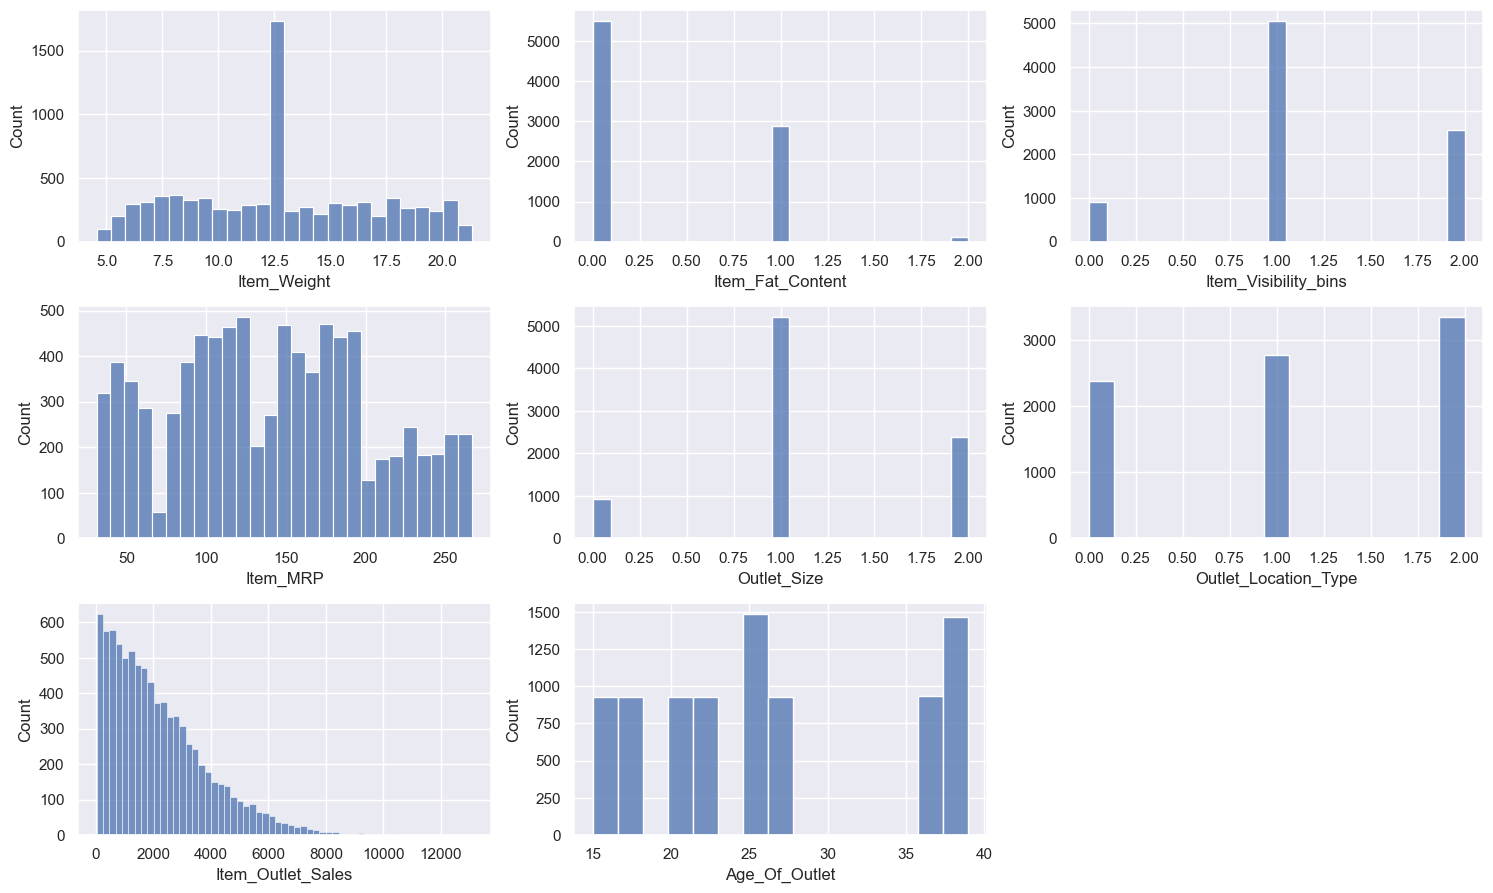

In [28]:
'''
Now lets do the EDA (Exploretory data analysis)
using histograms and heatmap correlation matrix
'''
list_for_histogram = ['Item_Weight','Item_Fat_Content','Item_Visibility_bins','Item_MRP','Outlet_Size','Outlet_Location_Type','Item_Outlet_Sales','Age_Of_Outlet']
num_items = len(bigMartData_transformed[list_for_histogram].keys())
# Calculate the number of rows and columns you need
num_rows = int(np.ceil(num_items / 3))  # Adjust the divisor based on your preference for the layout
num_cols = 3  # Or any other factor that you prefer
#will see how the data has been spreaded post capping
fig , axes =plt.subplots(num_rows , num_cols, figsize=(num_cols*5,num_rows*3))
index = 0
axes= axes.flatten()
index = 0
for key, value in bigMartData_transformed[list_for_histogram].items():
    if index < len(axes):  # Check to avoid IndexError
        sns.histplot(value, ax=axes[index])
        #axes[index].set_title(key)  # Optional: Set title to the key (column name)
        index += 1
    else:
        break  # Exit the loop if there are more items than subplots

# Hide any unused axes
for i in range(index, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=0.8, w_pad=0.9, h_pad=0.9)
plt.show()

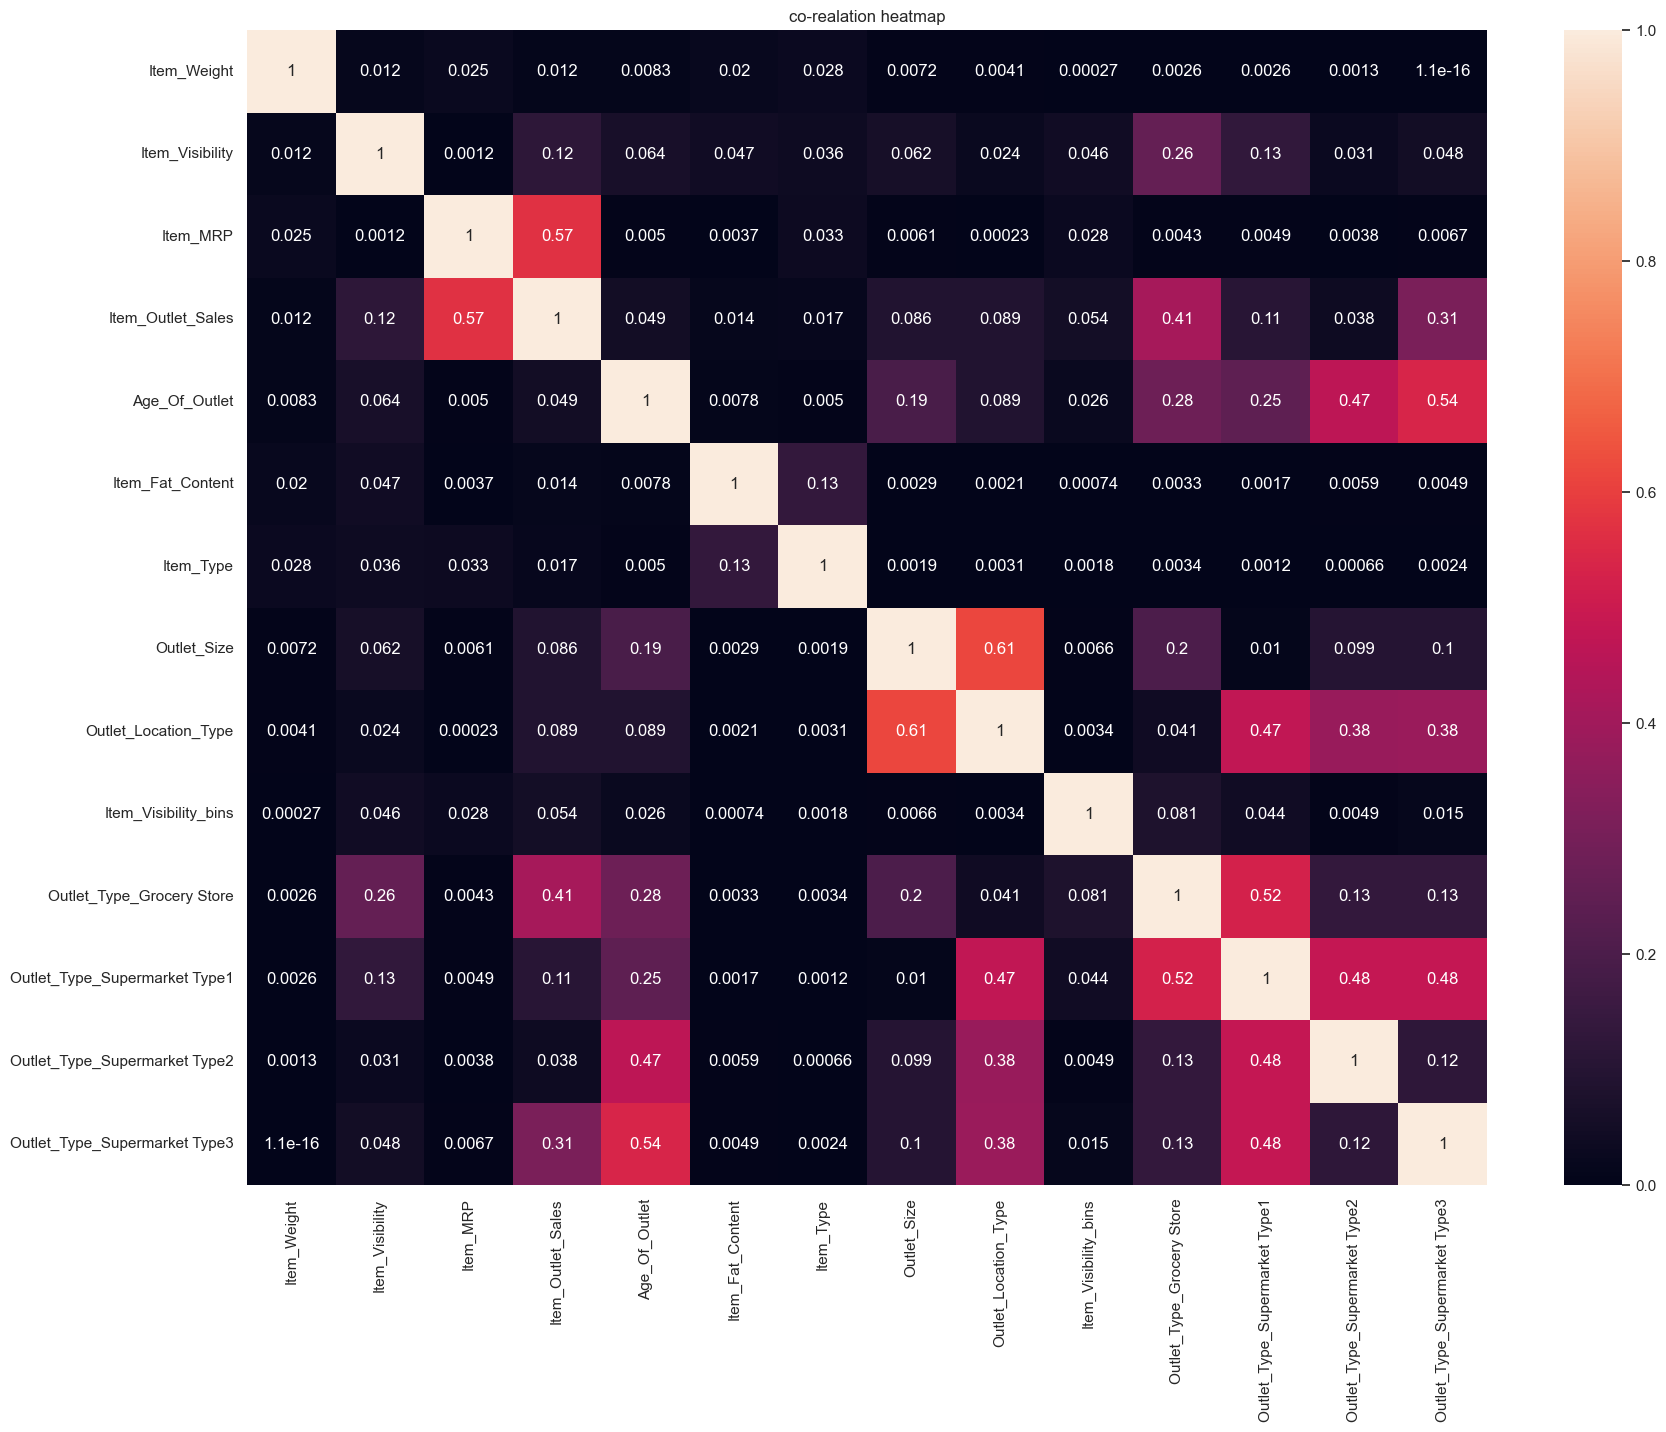

In [29]:
'''
now lets do the co-relation matrix observation by heatmap
in the heat map we can observer, the co-relation of sales with other independent features
Item_Mrp has the highest co-relation followeb by grocery strore, supermarket-type3
'''
plt.figure(figsize=(20, 15))
sns.heatmap(bigMartData_transformed.corr().abs(),annot=True)
plt.title('co-realation heatmap')
plt.show()

In [30]:
'''
will select the features and target
'''
features = bigMartData_transformed.drop(columns=['Item_Outlet_Sales'],axis=1)
target = bigMartData_transformed['Item_Outlet_Sales']

In [31]:
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [32]:
#now lets split the data
features_train,features_test,target_train, target_test = train_test_split(features,target,train_size=0.7,random_state=2)

In [33]:
#lets try the linear-Regression
line_reg = LinearRegression()
line_reg.fit(features_train,target_train)
target_test_predicted = line_reg.predict(features_test) 
target_train_predicted = line_reg.predict(features_train) 

#RMSE 
rmse_train = np.sqrt(mean_squared_error(target_train,target_train_predicted))
rmse_test = np.sqrt(mean_squared_error(target_test,target_test_predicted))
rmse_matrix = {'rmse_train':np.round(rmse_train,2),'rmse_test':np.round(rmse_test,2)}
data = [[key,value] for key, value in rmse_matrix.items()]
header = ['RMSE LinearRegression']
rmse_data = tabulate(data,headers=header,tablefmt='grid')
print(rmse_data)

#r2_score
r2_train = r2_score(target_train,target_train_predicted)
r2_test = r2_score(target_test,target_test_predicted)
r2_score_matrix = {'r2_train':np.round(r2_train,2),'r2_test':np.round(r2_test,2)}
data = [[key,value] for key, value in r2_score_matrix.items()]
header = ['R2_score LinearRegression']
r2_score_data = tabulate(data,headers=header,tablefmt='grid')
print(r2_score_data)

print("Accuracy of the Model", line_reg.score(features_test, target_test)*100)

+------------+-------------------------+
|            |   RMSE LinearRegression |
+============+=========================+
| rmse_train |                 1115.08 |
+------------+-------------------------+
| rmse_test  |                 1162.4  |
+------------+-------------------------+
+----------+-----------------------------+
|          |   R2_score LinearRegression |
+==========+=============================+
| r2_train |                        0.56 |
+----------+-----------------------------+
| r2_test  |                        0.56 |
+----------+-----------------------------+
Accuracy of the Model 56.30241533855518


In [34]:
from sklearn.ensemble import RandomForestRegressor

#lets try the RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(features_train,target_train)
target_test_predicted = rfr.predict(features_test) 
target_train_predicted = rfr.predict(features_train) 

#RMSE 
rmse_train = np.sqrt(mean_squared_error(target_train,target_train_predicted))
rmse_test = np.sqrt(mean_squared_error(target_test,target_test_predicted))
rmse_matrix = {'rmse_train':np.round(rmse_train,2),'rmse_test':np.round(rmse_test,2)}
data = [[key,value] for key, value in rmse_matrix.items()]
header = ['RMSE RandomForestRegressor']
rmse_data = tabulate(data,headers=header,tablefmt='grid')
print(rmse_data)

#r2_score
r2_train = r2_score(target_train,target_train_predicted)
r2_test = r2_score(target_test,target_test_predicted)
r2_score_matrix = {'r2_train':np.round(r2_train,2),'r2_test':np.round(r2_test,2)}
data = [[key,value] for key, value in r2_score_matrix.items()]
header = ['R2_score RandomForestRegressor']
r2_score_data = tabulate(data,headers=header,tablefmt='grid')
print(r2_score_data)

print("Accuracy of the Model", rfr.score(features_test, target_test)*100)

+------------+------------------------------+
|            |   RMSE RandomForestRegressor |
+============+==============================+
| rmse_train |                       419.85 |
+------------+------------------------------+
| rmse_test  |                      1151.51 |
+------------+------------------------------+
+----------+----------------------------------+
|          |   R2_score RandomForestRegressor |
+==========+==================================+
| r2_train |                             0.94 |
+----------+----------------------------------+
| r2_test  |                             0.57 |
+----------+----------------------------------+
Accuracy of the Model 57.117032442110826


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

#lets try the GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(features_train,target_train)
target_test_predicted = gbr.predict(features_test) 
target_train_predicted = gbr.predict(features_train) 

#RMSE 
rmse_train = np.sqrt(mean_squared_error(target_train,target_train_predicted))
rmse_test = np.sqrt(mean_squared_error(target_test,target_test_predicted))
rmse_matrix = {'rmse_train':np.round(rmse_train,2),'rmse_test':np.round(rmse_test,2)}
data = [[key,value] for key, value in rmse_matrix.items()]
header = ['RMSE GradientBoostingRegressor']
rmse_data = tabulate(data,headers=header,tablefmt='grid')
print(rmse_data)

#r2_score
r2_train = r2_score(target_train,target_train_predicted)
r2_test = r2_score(target_test,target_test_predicted)
r2_score_matrix = {'r2_train':np.round(r2_train,2),'r2_test':np.round(r2_test,2)}
data = [[key,value] for key, value in r2_score_matrix.items()]
header = ['R2_score GradientBoostingRegressor']
r2_score_data = tabulate(data,headers=header,tablefmt='grid')
print(r2_score_data)

print("Accuracy of the Model", gbr.score(features_test, target_test)*100)

+------------+----------------------------------+
|            |   RMSE GradientBoostingRegressor |
+============+==================================+
| rmse_train |                          1009.78 |
+------------+----------------------------------+
| rmse_test  |                          1113.58 |
+------------+----------------------------------+
+----------+--------------------------------------+
|          |   R2_score GradientBoostingRegressor |
+==========+======================================+
| r2_train |                                 0.64 |
+----------+--------------------------------------+
| r2_test  |                                 0.6  |
+----------+--------------------------------------+
Accuracy of the Model 59.89580165808961


In [36]:
#%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

#lets try the XGBRegressor
xgb = XGBRegressor()
xgb.fit(features_train,target_train)
target_test_predicted = xgb.predict(features_test) 
target_train_predicted = xgb.predict(features_train) 

#RMSE 
rmse_train = np.sqrt(mean_squared_error(target_train,target_train_predicted))
rmse_test = np.sqrt(mean_squared_error(target_test,target_test_predicted))
rmse_matrix = {'rmse_train':np.round(rmse_train,2),'rmse_test':np.round(rmse_test,2)}
data = [[key,value] for key, value in rmse_matrix.items()]
header = ['RMSE XGBRegressor']
rmse_data = tabulate(data,headers=header,tablefmt='grid')
print(rmse_data)

#r2_score
r2_train = r2_score(target_train,target_train_predicted)
r2_test = r2_score(target_test,target_test_predicted)
r2_score_matrix = {'r2_train':np.round(r2_train,2),'r2_test':np.round(r2_test,2)}
data = [[key,value] for key, value in r2_score_matrix.items()]
header = ['R2_score XGBRegressor']
r2_score_data = tabulate(data,headers=header,tablefmt='grid')
print(r2_score_data)

print("Accuracy of the Model", xgb.score(features_test, target_test)*100)


+------------+---------------------+
|            |   RMSE XGBRegressor |
+============+=====================+
| rmse_train |              591.34 |
+------------+---------------------+
| rmse_test  |             1182.65 |
+------------+---------------------+
+----------+-------------------------+
|          |   R2_score XGBRegressor |
+==========+=========================+
| r2_train |                    0.88 |
+----------+-------------------------+
| r2_test  |                    0.55 |
+----------+-------------------------+
Accuracy of the Model 54.76672799083646


In [41]:
#now lets try the ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)

'''
alpha: Controls the overall strength of the regularization. 
A larger value of alpha means more regularization, 
which can help reduce overfitting but may also lead to underfitting if it's too high.

l1_ratio: Determines the balance between L1 and L2 regularization. 
You can tune this parameter to find the optimal blend for your specific dataset.
'''
# Initialize ElasticNet
elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.6)

# Fit the model
elastic_net.fit(X_train_scaled, target_train)

# Predict and evaluate
target_test_predicted = elastic_net.predict(X_test_scaled)
target_train_predicted = elastic_net.predict(X_train_scaled) 

#RMSE 
rmse_train = np.sqrt(mean_squared_error(target_train,target_train_predicted))
rmse_test = np.sqrt(mean_squared_error(target_test,target_test_predicted))
rmse_matrix = {'rmse_train':np.round(rmse_train,2),'rmse_test':np.round(rmse_test,2)}
data = [[key,value] for key, value in rmse_matrix.items()]
header = ['RMSE ElasticNet']
rmse_data = tabulate(data,headers=header,tablefmt='grid')
print(rmse_data)

#r2_score
r2_train = r2_score(target_train,target_train_predicted)
r2_test = r2_score(target_test,target_test_predicted)
r2_score_matrix = {'r2_train':np.round(r2_train,2),'r2_test':np.round(r2_test,2)}
data = [[key,value] for key, value in r2_score_matrix.items()]
header = ['R2_score ElasticNet']
r2_score_data = tabulate(data,headers=header,tablefmt='grid')
print(r2_score_data)

print("Accuracy of the Model", xgb.score(features_test, target_test)*100)

+------------+-------------------+
|            |   RMSE ElasticNet |
+============+===================+
| rmse_train |           1122.83 |
+------------+-------------------+
| rmse_test  |           1174.92 |
+------------+-------------------+
+----------+-----------------------+
|          |   R2_score ElasticNet |
+==========+=======================+
| r2_train |                  0.56 |
+----------+-----------------------+
| r2_test  |                  0.55 |
+----------+-----------------------+
Accuracy of the Model 54.76672799083646
